### Check for GPU avaliability and filter PyTorch warnings

In [3]:
import torch
import warnings
warnings.filterwarnings("ignore", "You are using `torch.load` with `weights_only=False`*.")

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

PyTorch version: 2.4.1+cu121
CUDA available: True
GPU device: NVIDIA GeForce RTX 3070 Ti
Device: cuda


### Download the EMNIST dataset and save it as PyTorch tensors

100%|██████████| 561753746/561753746 [00:17<00:00, 31313726.74it/s]


Extracting datasets\EMNIST\raw\gzip.zip to datasets\EMNIST\raw
Saving dataset to datasets/emnist

Dataset saved with shapes:
Training images: torch.Size([240000, 1, 28, 28])
Training labels: torch.Size([240000])
Test images: torch.Size([40000, 1, 28, 28])
Test labels: torch.Size([40000])


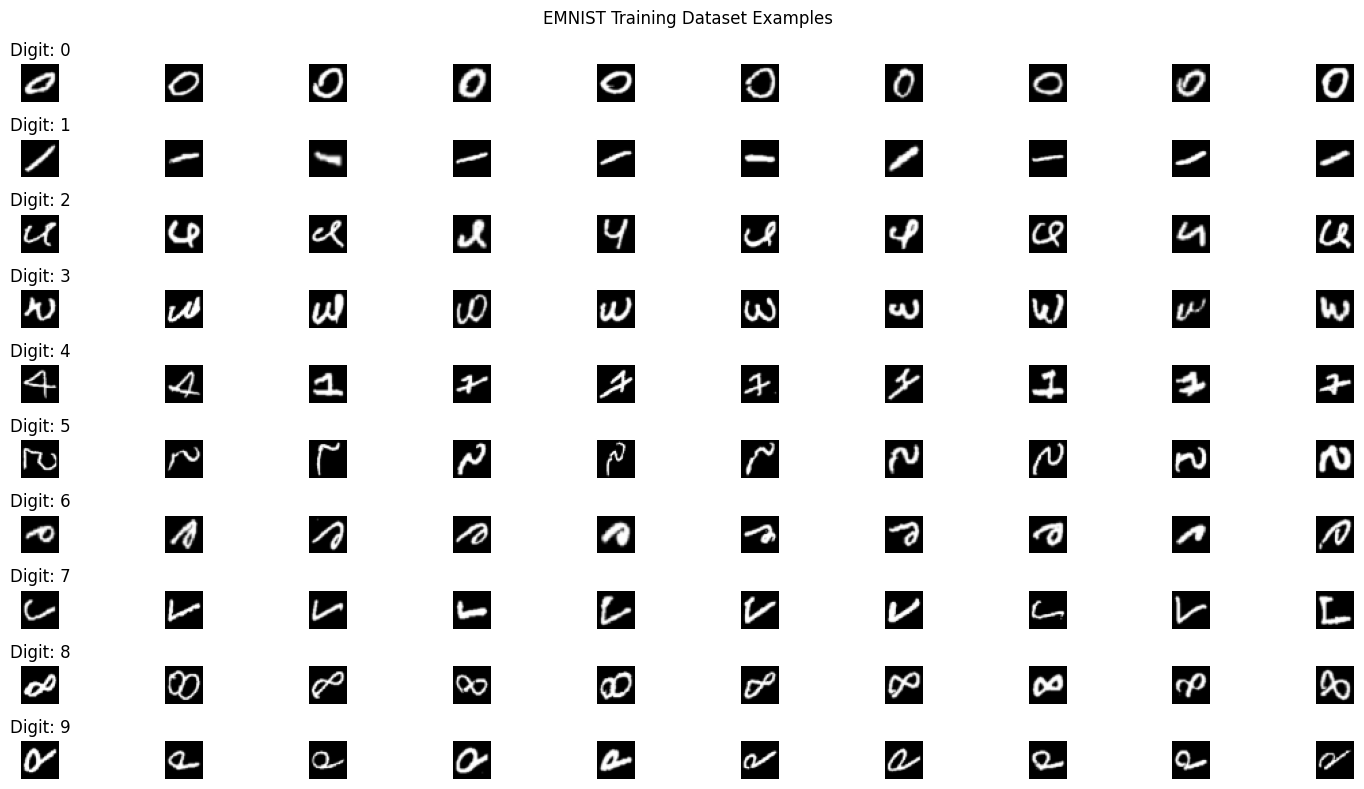

In [9]:
from emnist_download import prepare_emnist_dataset
train_images, train_labels, test_images, test_labels = prepare_emnist_dataset()

### Augment the EMNIST dataset 9 times (to create a dataset 10x EMNIST)

Creating new augmented datasets...
Using device: cuda
Copying original images...

Generating augmentations...


Augmentation 9/9: 100%|██████████| 625/625 [01:56<00:00,  5.37it/s]



Dataset shape:
Training images: torch.Size([2400000, 1, 28, 28])
Training labels: torch.Size([2400000])


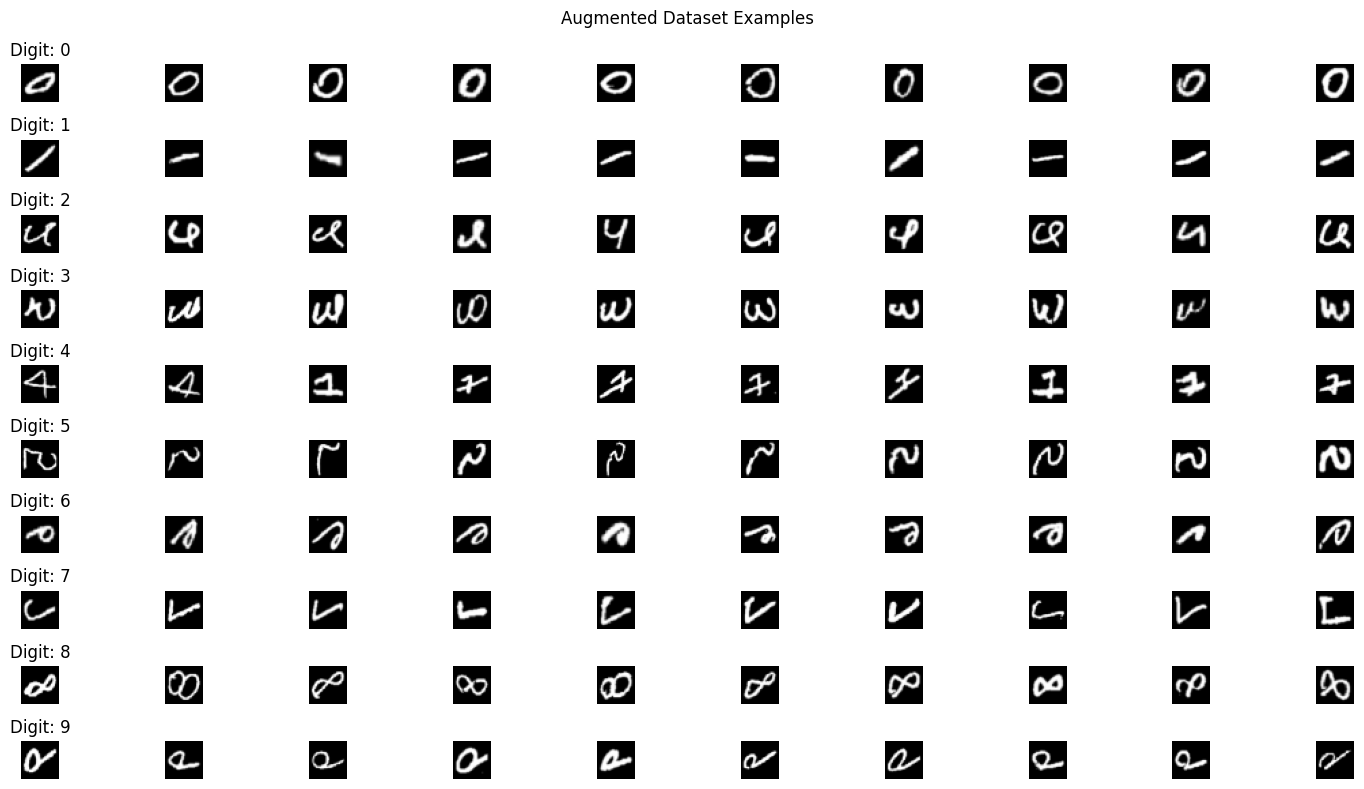

In [12]:
from dataset_augmenter import augment_emnist_dataset

augmented_images, augmented_labels = augment_emnist_dataset()

### Create your own MNIST-like dataset

Dataset already exists, loading...
Dataset loaded successfully!
Images tensor shape: torch.Size([10000, 1, 28, 28])
Labels tensor shape: torch.Size([10000])


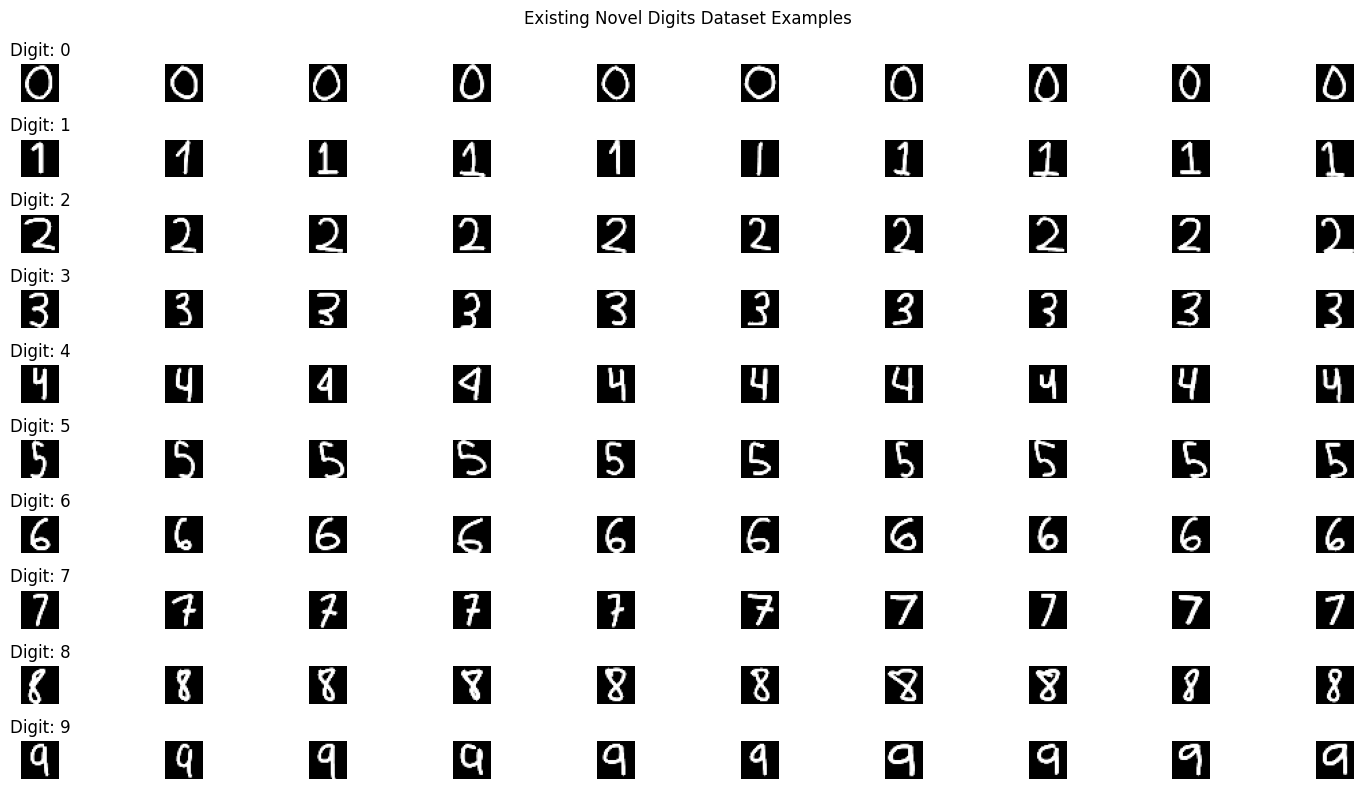

In [14]:
from novel_digits import create_or_load_novel_digits_dataset
novel_dataset = create_or_load_novel_digits_dataset()

### Train basic NN model on EMNIST

In [15]:
from train import train_model

model = train_model("basenn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train partial CNN model on EMNIST

In [16]:
from train import train_model

model = train_model("partialcnn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train full CNN model on EMNIST

In [17]:
from train import train_model

model = train_model("fullcnn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train RNN model on EMNIST

In [18]:
from train import train_model

model = train_model("rnn", use_augmentation=False)

Using device: cuda
Loading existing model...
Model loaded successfully!


### Train NN model on augmented EMNIST

In [19]:
from train import train_model

model = train_model("basenn", use_augmentation=True)

Using device: cuda
No existing model found. Training new model...
Loading dataset...
Dataset loaded: 2400000 training samples, 40000 test samples

Starting training for 10 epochs...
Epoch 1/10 - Progress: 99.9% - Loss: 0.106 - Accuracy: 0.969

Epoch 1/10 completed
Train Loss: 0.106, Train Accuracy: 0.969
Test Loss: 0.033, Test Accuracy: 0.991

Epoch 2/10 - Progress: 99.9% - Loss: 0.075 - Accuracy: 0.978

Epoch 2/10 completed
Train Loss: 0.075, Train Accuracy: 0.978
Test Loss: 0.026, Test Accuracy: 0.992

Epoch 3/10 - Progress: 99.9% - Loss: 0.067 - Accuracy: 0.980

Epoch 3/10 completed
Train Loss: 0.067, Train Accuracy: 0.980
Test Loss: 0.024, Test Accuracy: 0.993

Epoch 4/10 - Progress: 99.9% - Loss: 0.061 - Accuracy: 0.982

Epoch 4/10 completed
Train Loss: 0.061, Train Accuracy: 0.982
Test Loss: 0.025, Test Accuracy: 0.993

Epoch 5/10 - Progress: 99.9% - Loss: 0.058 - Accuracy: 0.983

Epoch 5/10 completed
Train Loss: 0.058, Train Accuracy: 0.983
Test Loss: 0.023, Test Accuracy: 0.993

### Train partial CNN model on augmented EMNIST

In [20]:
from train import train_model

model = train_model("partialcnn", use_augmentation=True)

Using device: cuda
No existing model found. Training new model...
Loading dataset...
Dataset loaded: 2400000 training samples, 40000 test samples

Starting training for 10 epochs...
Epoch 1/10 - Progress: 99.9% - Loss: 0.081 - Accuracy: 0.977

Epoch 1/10 completed
Train Loss: 0.081, Train Accuracy: 0.977
Test Loss: 0.015, Test Accuracy: 0.996

Epoch 2/10 - Progress: 99.9% - Loss: 0.043 - Accuracy: 0.988

Epoch 2/10 completed
Train Loss: 0.043, Train Accuracy: 0.988
Test Loss: 0.014, Test Accuracy: 0.996

Epoch 3/10 - Progress: 99.9% - Loss: 0.037 - Accuracy: 0.990

Epoch 3/10 completed
Train Loss: 0.037, Train Accuracy: 0.990
Test Loss: 0.013, Test Accuracy: 0.997

Epoch 4/10 - Progress: 99.9% - Loss: 0.034 - Accuracy: 0.991

Epoch 4/10 completed
Train Loss: 0.034, Train Accuracy: 0.991
Test Loss: 0.012, Test Accuracy: 0.997

Epoch 5/10 - Progress: 99.9% - Loss: 0.032 - Accuracy: 0.991

Epoch 5/10 completed
Train Loss: 0.032, Train Accuracy: 0.991
Test Loss: 0.012, Test Accuracy: 0.997

### Train full CNN model on augmented EMNIST

In [ ]:
from train import train_model

model = train_model("fullcnn", use_augmentation=True)

Using device: cuda
No existing model found. Training new model...
Loading dataset...
Dataset loaded: 2400000 training samples, 40000 test samples

Starting training for 10 epochs...
Epoch 1/10 - Progress: 10.0% - Loss: 1.342 - Accuracy: 0.518

### Train RNN model on augmented EMNIST

In [ ]:
from train import train_model

model = train_model("rnn", use_augmentation=True)

### Test NN model (trained on original EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("basenn")

### Test Partial CNN model (trained on original EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("partialcnn")

### Test Full CNN model (trained on original EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("fullcnn")

### Test RNN model (trained on original EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("rnn")

### Test NN model (trained on augmented EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("basenn_augmented")

### Test Partial CNN model (trained on augmented EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("partialcnn_augmented")

### Test Full CNN model (trained on augmented EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("fullcnn_augmented")

### Test RNN model (trained on augmented EMNIST) on EMNIST and novel datasets

In [ ]:
from test import test_model

test_model("rnn_augmented")